<a href="https://colab.research.google.com/github/Sazim2019331087/voice_model/blob/main/voice_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [ ]:
!pip install librosa numpy pandas scikit-learn

# Importing libraries

In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os

# Load CSV file with person's data

In [ ]:
data = pd.read_csv('main_data.csv')

# Check data samples in csv file

In [ ]:
data = data.dropna()
data.head()

,email,name,age,gender,institute,dept_or_class,language,audio_ffile
0,shadmim-cse@sust.edu,Sifat,27,Male,SUST,CSE,Bangla,6759b4871227a.wav
1,codeanindya@gmail.com,Anindya,15,Male,Scholarshome,Class 9,English,675c793628169.wav
2,tahmidkabiraddin@gmail.com,Tahmid Kabir,24,Male,SUST,CSE,English,675d9552e3d4b.wav
3,pappu457373@gmail.com,Pappu Roy,24,Male,SUST,CSE,Bangla,6757a85d9e5e1.wav
4,shohanur.rahman133883@gmail.com,Shohanur Rahman,24,Male,SUST,CSE,Bangla,676c161e06a4a.wav


# Dataset Distribution and Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("main_data.csv")

# Cleaning and preprocessing
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data.dropna(subset=['age'], inplace=True)

## **Age-wise** Distribution

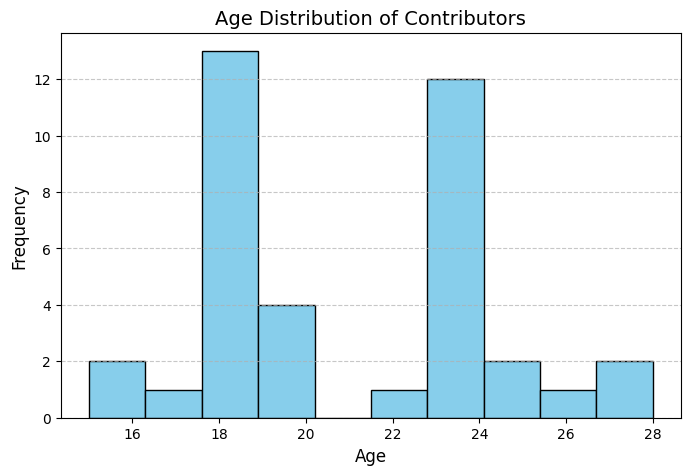

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Contributors', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Gender-wise** Distribution

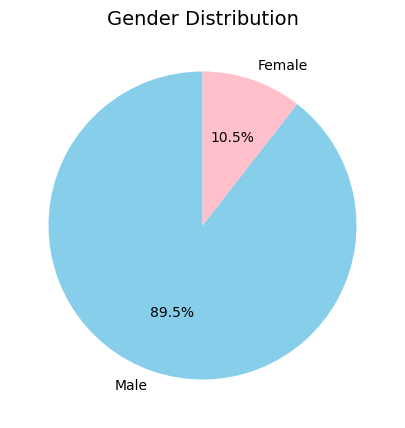

In [ ]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(7, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'], labels=['Male', 'Female'])
plt.title('Gender Distribution', fontsize=14)
plt.ylabel('')
plt.show()

## **Language-wise** Distribution

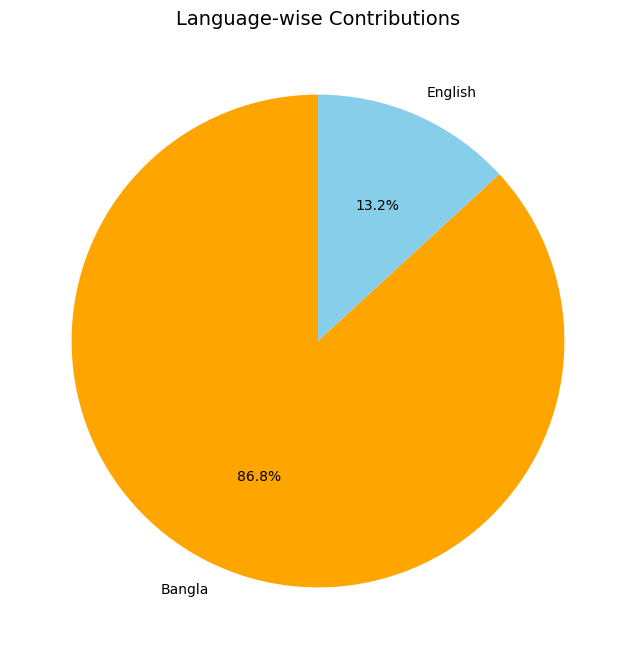

In [ ]:
language_counts = data['language'].value_counts()
plt.figure(figsize=(8, 8))
language_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue', 'orange'], labels=language_counts.index)
plt.title('Language-wise Contributions', fontsize=14)
plt.ylabel('')
plt.show()

## **Department/Class** -wise Distribution

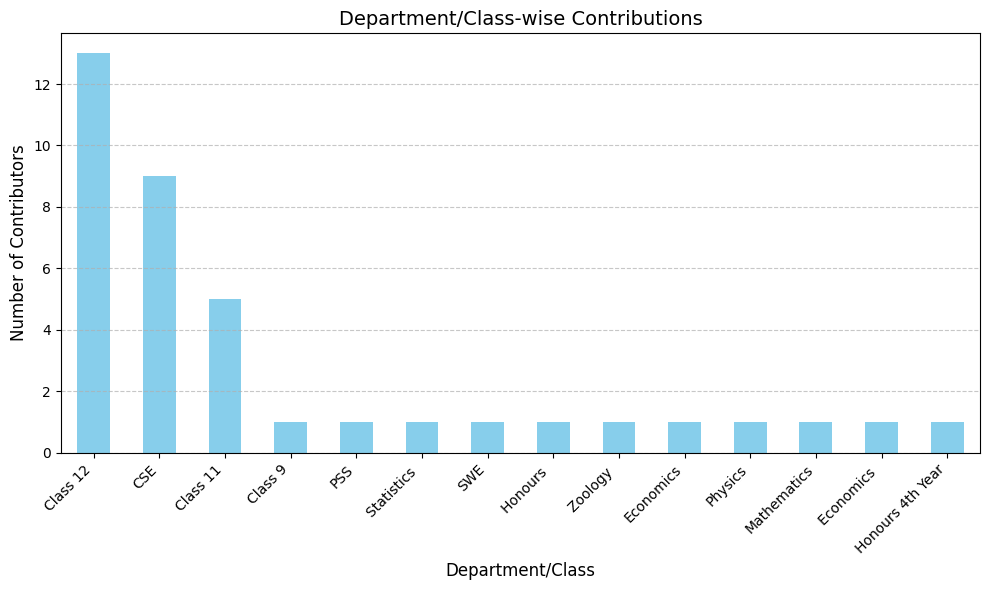

In [ ]:
dept_or_class_counts = data['dept_or_class'].value_counts()
plt.figure(figsize=(10, 6))
dept_or_class_counts.plot(kind='bar', color='skyblue')
plt.title('Department/Class-wise Contributions', fontsize=14)
plt.xlabel('Department/Class', fontsize=12)
plt.ylabel('Number of Contributors', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Institution-wise** Distribution

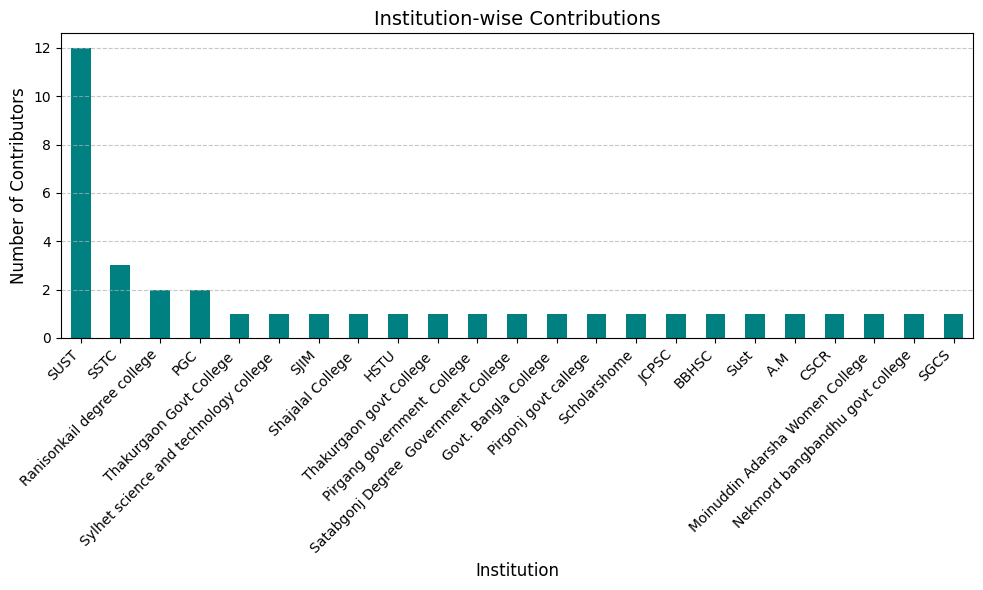

In [ ]:
institution_counts = data['institute'].value_counts()
plt.figure(figsize=(10, 6))
institution_counts.plot(kind='bar', color='teal')
plt.title('Institution-wise Contributions', fontsize=14)
plt.xlabel('Institution', fontsize=12)
plt.ylabel('Number of Contributors', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Encoding email as numerical labels

In [ ]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['email'])
data.head()

,email,name,age,gender,institute,dept_or_class,language,audio_ffile,label
0,shadmim-cse@sust.edu,Sifat,27,Male,SUST,CSE,Bangla,6759b4871227a.wav,31
1,codeanindya@gmail.com,Anindya,15,Male,Scholarshome,Class 9,English,675c793628169.wav,10
2,tahmidkabiraddin@gmail.com,Tahmid Kabir,24,Male,SUST,CSE,English,675d9552e3d4b.wav,35
3,pappu457373@gmail.com,Pappu Roy,24,Male,SUST,CSE,Bangla,6757a85d9e5e1.wav,24
4,shohanur.rahman133883@gmail.com,Shohanur Rahman,24,Male,SUST,CSE,Bangla,676c161e06a4a.wav,32


# Extracting MFCC Features

In [ ]:
def extract_mfcc(file_path, n_mfcc=13, max_len=130):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfcc = np.pad(mfcc, ((0, 0), (0, max(0, max_len - mfcc.shape[1]))), mode='constant')
    return mfcc[:, :max_len]

# Data Preparation for model

In [ ]:
X, y = [], []
for _, row in data.iterrows():
    file_path = os.path.join('voices', row['audio_ffile'])
    if os.path.exists(file_path):
        mfcc_features = extract_mfcc(file_path)
        X.append(mfcc_features)
        y.append(row['label'])

<ipython-input-5-4c1d2a8242f5>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-4c1d2a8242f5>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-4c1d2a8242f5>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/

# Data Shape for model

In [ ]:
X = np.array(X)
y = np.array(y)

print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

Features Shape: (36, 13, 130)
Labels Shape: (36,)


# Sample features

In [ ]:
X[0:2]

array([[[-6.3514685e+02, -6.3506653e+02, -6.3481854e+02, ...,
         -6.3184058e+02, -6.3268500e+02, -6.3506610e+02],
        [ 0.0000000e+00,  1.1288581e-01,  4.6094662e-01, ...,
          4.4878225e+00,  3.4037979e+00,  1.1132079e-01],
        [ 0.0000000e+00,  1.1081908e-01,  4.5103851e-01, ...,
          3.9650378e+00,  3.1796167e+00,  1.0292378e-01],
        ...,
        [ 0.0000000e+00,  5.1066417e-02,  1.7111459e-01, ...,
          1.7136666e-01,  6.8116337e-02, -4.5000918e-02],
        [ 0.0000000e+00,  3.9572645e-02,  1.1889296e-01, ...,
         -5.2137114e-02, -1.3146371e-01, -5.5218738e-02],
        [ 0.0000000e+00,  2.7597532e-02,  6.5137662e-02, ...,
         -3.6982465e-01, -2.7765200e-01, -6.0780726e-02]],

       [[-4.6928592e+02, -4.3035760e+02, -4.2865878e+02, ...,
         -3.2463712e+02, -3.2710052e+02, -3.3129858e+02],
        [ 8.0398819e+01,  9.6221138e+01,  8.4520340e+01, ...,
          1.6423160e+02,  1.5915305e+02,  1.5457370e+02],
        [ 3.7061352e+01, 

# Sample labels

In [ ]:
y[0:5]

array([31, 10, 35, 24, 32])

# Model Development

## *Tensorflow installation for CNN*

In [ ]:
!pip install tensorflow

## *Importing Tensorflow for CNN*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

## *Build model*

In [ ]:
model = Sequential([

    # 1st Convolutional Layer
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(13, 130)),
    # Conv1D: Extracts local features from MFCC data
    # 32 filters: Determines the number of feature detectors. Can be increased to 64 or 128 to improve performance.
    # kernel_size=3: Defines the receptive field size. Can be increased to 5 for capturing wider feature patterns.
    # activation='relu': Helps with non-linearity, preventing vanishing gradients.

    MaxPooling1D(pool_size=2),
    # Pooling layer to downsample features and reduce dimensionality
    # pool_size=2: Reduces computational cost and overfitting. Larger values may discard too much information.

    ### 1st Layer Ends. 2nd Layer starts ###

    # 2nd Convolutional Layer
    Conv1D(64, kernel_size=3, activation='relu'),
    # 64 filters: More feature detectors compared to the first layer. Can be increased for capturing more complex patterns.

    MaxPooling1D(pool_size=2),
    # Second pooling layer to further reduce dimensionality.

    Flatten(),
    # Converts 2D feature maps into a 1D array for the dense layer.

    Dense(128, activation='relu'),
    # Fully connected layer for feature learning
    # 128 neurons: Controls the learning capacity. Can be increased to 256 for better feature representation.

    Dropout(0.5),
    # Prevents overfitting by randomly disabling 50% of neurons.
    # Can be adjusted (e.g., 0.3 or 0.4) for better regularization.

    Dense(len(label_encoder.classes_), activation='softmax')
    # Output layer with 'softmax' activation for multi-class classification.
    # Number of neurons = number of unique speakers.
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## *Compiling Model*

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimizer='adam': Adaptive learning rate optimizer. Can be changed to 'SGD' or 'RMSprop' for better convergence.
# loss='sparse_categorical_crossentropy': Used for multi-class classification. Categorical cross-entropy can be used if one-hot encoding is applied.
# metrics=['accuracy']: Measures model performance.

## *Train Model*

In [ ]:
history = model.fit(X, y, epochs=50, batch_size=8, validation_split=0.2)
# epochs=50: Number of iterations over the dataset. Increasing to 100 may improve results.
# batch_size=8: Number of samples per gradient update. Increasing to 16 or 32 can help optimize training speed.

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.0351 - loss: 207.4009 - val_accuracy: 0.1250 - val_loss: 49.6582
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0226 - loss: 108.1577 - val_accuracy: 0.0000e+00 - val_loss: 42.3097
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0143 - loss: 63.1789 - val_accuracy: 0.0000e+00 - val_loss: 41.8035
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0351 - loss: 40.4506 - val_accuracy: 0.0000e+00 - val_loss: 32.9864
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 40.4285 - val_accuracy: 0.0000e+00 - val_loss: 18.5509
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0601 - loss: 22.6890 - val_accuracy: 0.0000e+00 - val_loss: 17.3521
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0577 - loss: 18.5140 - val_accuracy: 0.0000e+00 - val_loss: 14.7386
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 1

# Model Evaluation

# Overall accuracy

In [ ]:
loss, accuracy = model.evaluate(X, y)
print("Model Accuracy:", accuracy*100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8102 - loss: 2.7284  
Model Accuracy: 77.77777910232544


# Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
Unique Labels in y: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29 30 31 32 33 34 35 36 37]
Unique Labels in Predictions: [ 1  2  3  4  6  7  8  9 10 11 12 14 16 18 19 20 21 24 25 26 27 29 30 31
 32 33 34 35]


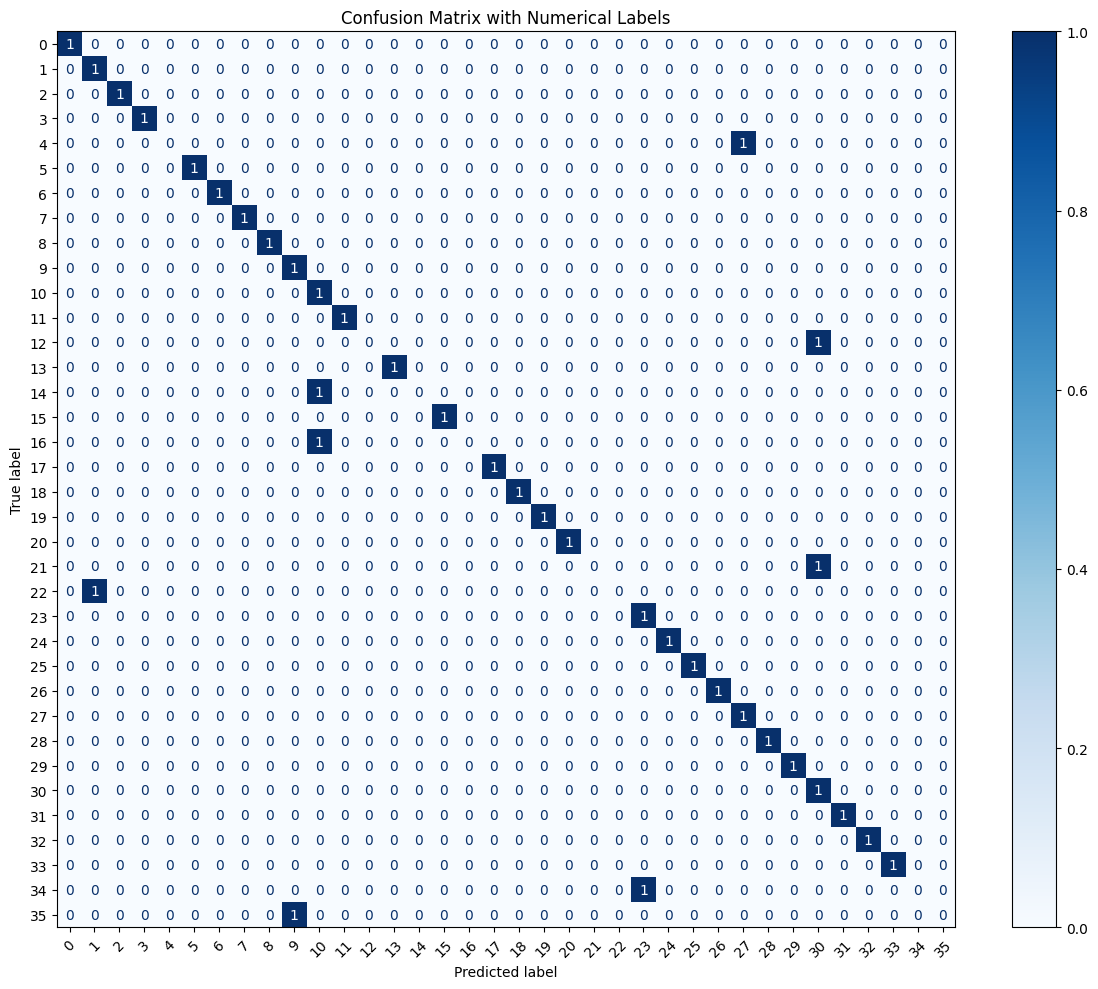

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict on the training data
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Debugging: Check unique labels
print("Unique Labels in y:", np.unique(y))
print("Unique Labels in Predictions:", np.unique(y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_classes)

# Ensure label range matches the confusion matrix
num_labels = len(np.unique(np.concatenate((y, y_pred_classes))))
label_range = np.arange(num_labels)

# Customize the display for better visibility
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_range)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=plt.gca())
plt.gca().imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')

# Enhance the visual appearance
plt.title('Confusion Matrix with Numerical Labels')
plt.xticks(ticks=np.arange(num_labels), labels=label_range, fontsize=10, rotation=45)
plt.yticks(ticks=np.arange(num_labels), labels=label_range, fontsize=10)
plt.grid(False)  # Remove default grid lines for better clarity
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Training & Validation Loss Curve

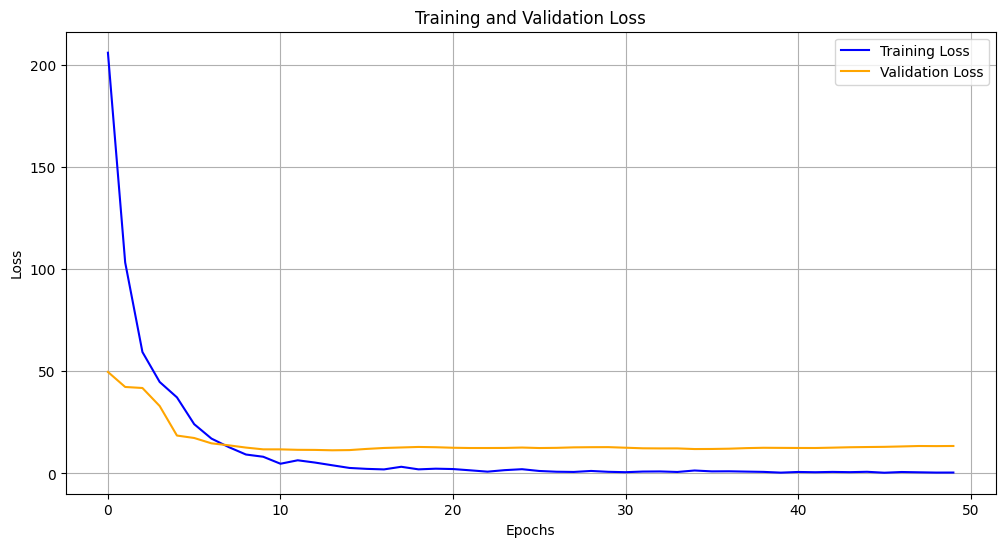

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# F1 Score , Recall & Precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.69
Recall: 0.78
F1-Score: 0.71


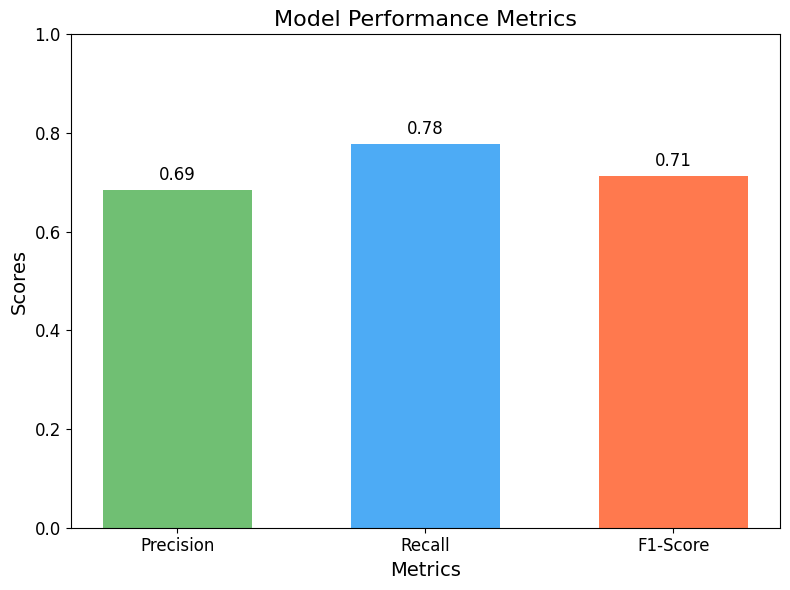

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate precision, recall, f1-score
precision = precision_score(y, y_pred_classes, average='weighted')
recall = recall_score(y, y_pred_classes, average='weighted')
f1 = f1_score(y, y_pred_classes, average='weighted')

# Display scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Create a bar chart to display the scores
scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-Score']
colors = ['#4CAF50', '#2196F3', '#FF5722']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=colors, alpha=0.8, width=0.6)
plt.ylim(0, 1)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Metrics', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the corresponding score
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Speaker Recognition by the model

## *Prediction Function*

In [ ]:
def predict_speaker(model, file_path):
    mfcc_features = extract_mfcc(file_path)
    mfcc_features = np.expand_dims(mfcc_features, axis=0)
    prediction = model.predict(mfcc_features)
    predicted_label = np.argmax(prediction)
    speaker_email = label_encoder.inverse_transform([predicted_label])
    return speaker_email[0]

## *Test Model by Prediction function*

In [ ]:
test_file = '/content/testing_voices/67617f742f784.wav'
predicted_email = predict_speaker(model, test_file)
print("Predicted Speaker Email:", predicted_email)

<ipython-input-9-4c1d2a8242f5>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Speaker Email: codeanindya@gmail.com
